In [16]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ML/updated/IslamiBank_HistoricalPrices - IslamiBank_HistoricalPrices.csv')

In [17]:
df

,Date,Open,High,Low,Close,Volume
0,1997-04-23,2.76,2.76,2.76,2.76,7.908723e+06
1,1997-07-07,2.37,2.37,2.37,2.37,1.835953e+05
2,1997-07-08,2.37,2.37,2.37,2.37,2.344371e+05
3,1997-07-09,2.34,2.34,2.34,2.34,2.824544e+04
4,1997-07-10,2.33,2.33,2.33,2.33,4.519270e+04
...,...,...,...,...,...,...
4365,2022-08-04,32.60,32.70,32.60,32.60,1.111740e+05
4366,2022-08-08,32.60,32.70,32.60,32.60,2.684520e+05
4367,2022-08-10,32.60,32.60,32.60,32.60,1.878880e+05
4368,2022-08-11,32.60,32.60,32.60,32.60,6.421100e+04


In [18]:
df = df[['Date', 'Close']]
df.head(10)

,Date,Close
0,1997-04-23,2.76
1,1997-07-07,2.37
2,1997-07-08,2.37
3,1997-07-09,2.34
4,1997-07-10,2.33
5,1997-07-14,2.24
6,1997-07-16,2.20
7,1997-07-17,2.19
8,1997-07-21,2.17
9,1997-07-22,2.17


In [19]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1998-08-23')
datetime_object

datetime.datetime(1998, 8, 23, 0, 0)

In [20]:
df['Date'] = df['Date'].apply(str_to_datetime)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
df['Date']

0      1997-04-23
1      1997-07-07
2      1997-07-08
3      1997-07-09
4      1997-07-10
          ...    
4365   2022-08-04
4366   2022-08-08
4367   2022-08-10
4368   2022-08-11
4369   2022-08-16
Name: Date, Length: 4370, dtype: datetime64[ns]

In [22]:
df.index = df.pop('Date')

In [23]:
df.index

DatetimeIndex(['1997-04-23', '1997-07-07', '1997-07-08', '1997-07-09',
               '1997-07-10', '1997-07-14', '1997-07-16', '1997-07-17',
               '1997-07-21', '1997-07-22',
               ...
               '2022-07-27', '2022-07-28', '2022-08-01', '2022-08-02',
               '2022-08-03', '2022-08-04', '2022-08-08', '2022-08-10',
               '2022-08-11', '2022-08-16'],
              dtype='datetime64[ns]', name='Date', length=4370, freq=None)

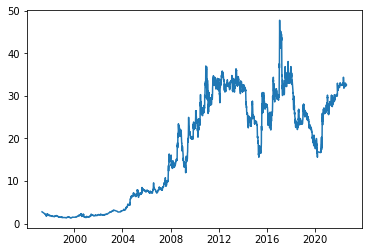

In [24]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [25]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  #print(target_date)
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+2)
    #print(df_subset)
    
    if len(df_subset) != n+2:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=100)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n+1):
    X[:, i]
    ret_df[f'Target-{n+1-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df



In [26]:
# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2010-08-23', 
                                '2022-08-11',                         
                                n=5)
windowed_df

,Target Date,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,2010-08-23,25.90,25.84,25.57,25.53,25.99,26.07,25.61
1,2010-08-24,25.84,25.57,25.53,25.99,26.07,25.61,25.65
2,2010-08-25,25.57,25.53,25.99,26.07,25.61,25.65,25.50
3,2010-08-26,25.53,25.99,26.07,25.61,25.65,25.50,25.44
4,2010-08-30,25.99,26.07,25.61,25.65,25.50,25.44,25.36
...,...,...,...,...,...,...,...,...
2267,2022-08-03,32.70,32.70,32.60,32.30,32.60,32.60,32.60
2268,2022-08-04,32.70,32.60,32.30,32.60,32.60,32.60,32.60
2269,2022-08-08,32.60,32.30,32.60,32.60,32.60,32.60,32.60
2270,2022-08-10,32.30,32.60,32.60,32.60,32.60,32.60,32.60


In [27]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((2272,), (2272, 6, 1), (2272,))

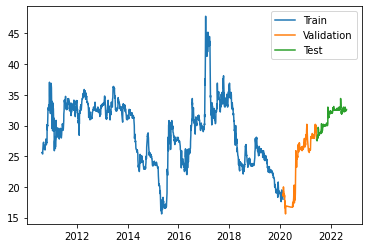

In [28]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90,]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((6, 1)),
                    layers.LSTM(128),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'])

# model.compile(
#     optimizer=Adam(learning_rate=0.001),
#     loss='mse',
#     metrics=[tf.keras.metrics.RootMeanSquaredError()])


In [30]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
57/57 [==============================] - 4s 23ms/step - loss: 274.6597 - mean_absolute_error: 12.7619 - val_loss: 55.6394 - val_mean_absolute_error: 6.1084
Epoch 2/100
57/57 [==============================] - 1s 12ms/step - loss: 12.7929 - mean_absolute_error: 2.5588 - val_loss: 0.7339 - val_mean_absolute_error: 0.6329
Epoch 3/100
57/57 [==============================] - 1s 12ms/step - loss: 0.8152 - mean_absolute_error: 0.5855 - val_loss: 0.5445 - val_mean_absolute_error: 0.5144
Epoch 4/100
57/57 [==============================] - 1s 12ms/step - loss: 0.6911 - mean_absolute_error: 0.5332 - val_loss: 0.5104 - val_mean_absolute_error: 0.4525
Epoch 5/100
57/57 [==============================] - 1s 12ms/step - loss: 0.6419 - mean_absolute_error: 0.5168 - val_loss: 0.5245 - val_mean_absolute_error: 0.5233
Epoch 6/100
57/57 [==============================] - 1s 12ms/step - loss: 0.7226 - mean_absolute_error: 0.5791 - val_loss: 0.5654 - val_mean_absolute_error: 0.5786
Epoch 7/100

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 6

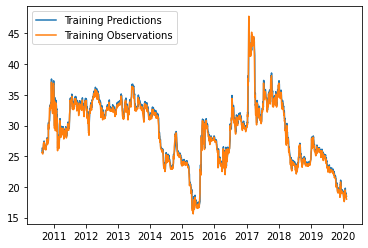

In [32]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

In [33]:
results = model.evaluate(X_train, y_train)

57/57 [==============================] - 0s 5ms/step - loss: 0.5146 - mean_absolute_error: 0.5058


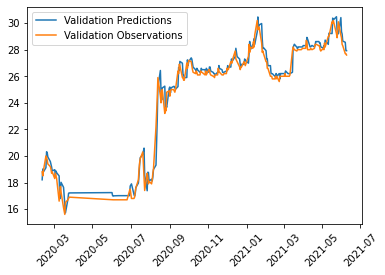

In [34]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.xticks(rotation = 45)
plt.legend(['Validation Predictions', 'Validation Observations'])

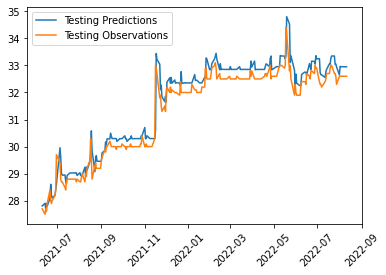

In [35]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.xticks(rotation = 45)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [36]:
results = model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 4ms/step - loss: 0.1985 - mean_absolute_error: 0.3604


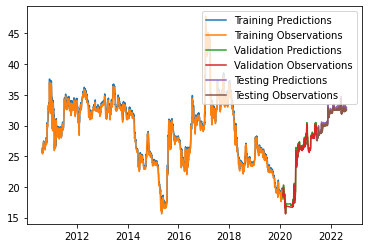

In [37]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])